# Intelligent Supplier Evaluation & Selection
Problem Description: What is the problem/ issue that is addressed and how is it approached today?
Supplier Evaluation and selection play an important role in Procurement. There is so much information gathered in enterprise for the decision making and it needs to be utilized efficiently to maximize the benefits. The value proposition of benefits is varied across the customer segments.

There is no process that can help predict the best possible characteristics and then maximize the benefits during the Supplier selection process.

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import datetime
from sklearn.metrics import confusion_matrix
import seaborn as sns

def getDataUniqueValue(data, factor):
    dataMap = {}
    count = 0
    for value in data:
        dataMap[value] = count + factor
        count = count + 1
    return dataMap

def plot_confusion_matrix(y, y_pred):
    plt.figure(figsize=(8, 6))
    sns.heatmap(pd.DataFrame(confusion_matrix(y, y_pred)), annot=True, fmt='d', cmap='YlGnBu', alpha=0.8, vmin=0)

In [11]:
dataDf = pd.read_csv('RFQ Data.csv', ",")
dataDf

,RFQ_ID,Material_Group,Req_Delivery_Date,Req_Quantity,Delivery_Location,Bidding_Price,Quotation_ID,Supplier,Delivery_Date,Quantity,Incoterm_Location,Price,Payment_Term,Quality,Service,Supplier_Awarded
0,65000001,Metals,1/3/2010,10,Bangalore,25,75000001,Supplier 1,5/3/2010,7,Bangalore,29,10,8,8,0
1,65000001,Metals,1/3/2010,10,Bangalore,25,75000002,Supplier 2,6/3/2010,6,Chennai,28,20,10,9,0
2,65000001,Metals,1/3/2010,10,Bangalore,25,75000003,Supplier 3,10/3/2010,8,Bangalore,32,5,8,8,0
3,65000001,Metals,1/3/2010,10,Bangalore,25,75000004,Supplier 4,10/3/2010,9,Mumbai,35,10,7,10,0
4,65000001,Metals,1/3/2010,10,Bangalore,25,75000005,Supplier 5,5/3/2010,6,Chennai,30,10,9,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,65000012,Glass,10/3/2010,10,Kolkata,30,75000092,Supplier 4,10/3/2010,9,Chennai,25,10,8,8,0
92,65000012,Glass,10/3/2010,10,Kolkata,30,75000093,Supplier 5,5/3/2010,6,Bangalore,30,10,8,9,0
93,65000012,Glass,10/3/2010,10,Kolkata,30,75000094,Supplier 6,6/3/2010,7,Kolkata,28,20,7,8,0
94,65000012,Glass,10/3/2010,10,Kolkata,30,75000095,Supplier 7,2/3/2010,8,Chennai,32,8,9,9,1


In [12]:
dataDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   RFQ_ID             96 non-null     int64 
 1   Material_Group     96 non-null     object
 2   Req_Delivery_Date  96 non-null     object
 3   Req_Quantity       96 non-null     int64 
 4   Delivery_Location  96 non-null     object
 5   Bidding_Price      96 non-null     int64 
 6   Quotation_ID       96 non-null     int64 
 7   Supplier           96 non-null     object
 8   Delivery_Date      96 non-null     object
 9   Quantity           96 non-null     int64 
 10  Incoterm_Location  96 non-null     object
 11  Price              96 non-null     int64 
 12  Payment_Term       96 non-null     int64 
 13  Quality            96 non-null     int64 
 14  Service            96 non-null     int64 
 15  Supplier_Awarded   96 non-null     int64 
dtypes: int64(10), object(6)
memory usage: 12.1+ KB

In [15]:
dataDf['Req_Delivery_Date'] = pd.to_datetime(dataDf['Req_Delivery_Date'])
dataDf['Delivery_Date'] = pd.to_datetime(dataDf['Delivery_Date'])
dataDf['No_Days'] = (dataDf['Delivery_Date'] - dataDf['Req_Delivery_Date']).dt.days
dataDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   RFQ_ID             96 non-null     int64         
 1   Material_Group     96 non-null     object        
 2   Req_Delivery_Date  96 non-null     datetime64[ns]
 3   Req_Quantity       96 non-null     int64         
 4   Delivery_Location  96 non-null     object        
 5   Bidding_Price      96 non-null     int64         
 6   Quotation_ID       96 non-null     int64         
 7   Supplier           96 non-null     object        
 8   Delivery_Date      96 non-null     datetime64[ns]
 9   Quantity           96 non-null     int64         
 10  Incoterm_Location  96 non-null     object        
 11  Price              96 non-null     int64         
 12  Payment_Term       96 non-null     int64         
 13  Quality            96 non-null     int64         
 14  Service     

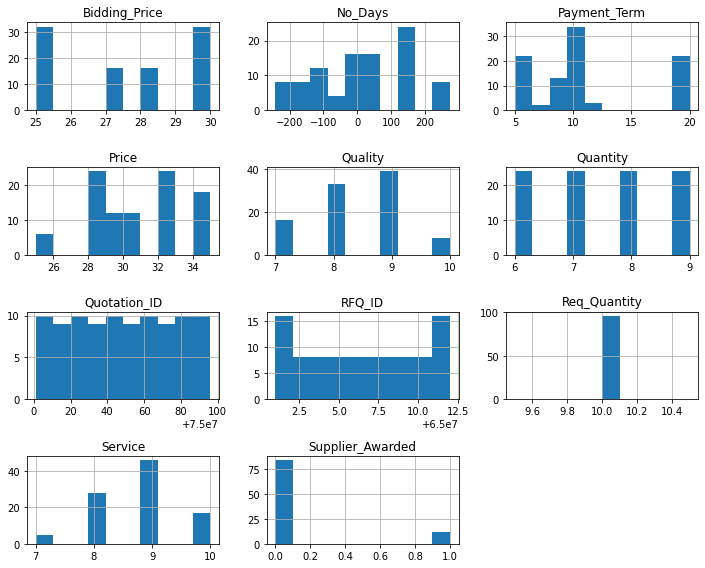

In [16]:
dataDf.hist(figsize=(10,8))
plt.tight_layout()

In [17]:
X = dataDf.drop(columns=['Quotation_ID', 'RFQ_ID', 'Supplier', 'Req_Delivery_Date', 'Delivery_Date'],axis=1)
y = dataDf['Supplier']
X

,Material_Group,Req_Quantity,Delivery_Location,Bidding_Price,Quantity,Incoterm_Location,Price,Payment_Term,Quality,Service,Supplier_Awarded,No_Days
0,Metals,10,Bangalore,25,7,Bangalore,29,10,8,8,0,120
1,Metals,10,Bangalore,25,6,Chennai,28,20,10,9,0,151
2,Metals,10,Bangalore,25,8,Bangalore,32,5,8,8,0,273
3,Metals,10,Bangalore,25,9,Mumbai,35,10,7,10,0,273
4,Metals,10,Bangalore,25,6,Chennai,30,10,9,9,0,120
...,...,...,...,...,...,...,...,...,...,...,...,...
91,Glass,10,Kolkata,30,9,Chennai,25,10,8,8,0,0
92,Glass,10,Kolkata,30,6,Bangalore,30,10,8,9,0,-153
93,Glass,10,Kolkata,30,7,Kolkata,28,20,7,8,0,-122
94,Glass,10,Kolkata,30,8,Chennai,32,8,9,9,1,-242


In [21]:
uniqueMG = dataDf["Material_Group"].unique().tolist()
uniqueMG

['Metals', 'Plastics', 'Rubber', 'Glass']

In [22]:
uniqueMGCode = getDataUniqueValue(uniqueMG, 100)
uniqueMGCode

{'Metals': 100, 'Plastics': 101, 'Rubber': 102, 'Glass': 103}

In [23]:
uniqueDelvLoc = dataDf["Delivery_Location"].unique().tolist()
uniqueDelvLoc

['Bangalore', 'Chennai', 'Mumbai', 'Kolkata']

In [24]:
dataDf["Incoterm_Location"].unique().tolist()

['Bangalore', 'Chennai', 'Mumbai', 'Kolkata']

In [25]:
uniqueLocCode = getDataUniqueValue(uniqueDelvLoc, 500)
uniqueLocCode

{'Bangalore': 500, 'Chennai': 501, 'Mumbai': 502, 'Kolkata': 503}

In [27]:
X = X.replace({'Material_Group':uniqueMGCode, 'Delivery_Location': uniqueLocCode, 'Incoterm_Location': uniqueLocCode})
X

,Material_Group,Req_Quantity,Delivery_Location,Bidding_Price,Quantity,Incoterm_Location,Price,Payment_Term,Quality,Service,Supplier_Awarded,No_Days
0,100,10,500,25,7,500,29,10,8,8,0,120
1,100,10,500,25,6,501,28,20,10,9,0,151
2,100,10,500,25,8,500,32,5,8,8,0,273
3,100,10,500,25,9,502,35,10,7,10,0,273
4,100,10,500,25,6,501,30,10,9,9,0,120
...,...,...,...,...,...,...,...,...,...,...,...,...
91,103,10,503,30,9,501,25,10,8,8,0,0
92,103,10,503,30,6,500,30,10,8,9,0,-153
93,103,10,503,30,7,503,28,20,7,8,0,-122
94,103,10,503,30,8,501,32,8,9,9,1,-242


In [28]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2)
train_x

,Material_Group,Req_Quantity,Delivery_Location,Bidding_Price,Quantity,Incoterm_Location,Price,Payment_Term,Quality,Service,Supplier_Awarded,No_Days
21,102,10,502,25,7,500,28,20,9,9,0,151
7,100,10,500,25,9,500,35,10,10,9,1,58
56,103,10,503,27,7,503,29,9,8,8,0,0
76,101,10,501,28,6,501,30,10,9,9,0,-153
36,100,10,500,30,6,501,30,10,9,9,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
78,101,10,501,28,8,501,32,5,9,10,1,-242
48,102,10,502,27,7,500,29,10,8,8,0,0
75,101,10,501,28,9,502,35,7,9,10,0,0
63,103,10,503,27,9,503,35,9,8,9,0,-62


In [38]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier()
model.fit(train_x, train_y)

# depth of the decision tree
print('Depth of the Decision Tree :', model.get_depth())

# predict the target on the train dataset
predict_train = model.predict(train_x)
print('Target on train data', predict_train[:5]) 

# Accuray Score on train dataset
accuracy_train = accuracy_score(train_y, predict_train)
print('accuracy_score on train dataset : ', accuracy_train)

Depth of the Decision Tree : 5
Target on train data ['Supplier 6' 'Supplier 8' 'Supplier 1' 'Supplier 5' 'Supplier 5']
accuracy_score on train dataset :  1.0


In [39]:
test_x

,Material_Group,Req_Quantity,Delivery_Location,Bidding_Price,Quantity,Incoterm_Location,Price,Payment_Term,Quality,Service,Supplier_Awarded,No_Days
40,101,10,501,30,7,500,29,10,8,8,0,0
20,102,10,502,25,6,501,30,10,9,9,0,120
72,101,10,501,28,7,500,29,10,8,8,0,-153
49,102,10,502,27,6,501,28,20,10,9,1,31
1,100,10,500,25,6,501,28,20,10,9,0,151
86,102,10,502,30,8,501,32,5,9,10,0,-242
95,103,10,503,30,9,503,35,9,8,9,0,-215
38,100,10,500,30,8,501,32,5,9,10,0,-89
5,100,10,500,25,7,500,28,20,9,9,0,151
2,100,10,500,25,8,500,32,5,8,8,0,273


In [40]:
# predict the target on the test dataset
predict_test = model.predict(test_x)
print('Target on test data', predict_test[:5]) 

# Accuracy Score on test dataset
accuracy_test = accuracy_score(test_y, predict_test)
print('accuracy_score on test dataset : ', accuracy_test)

Target on test data ['Supplier 1' 'Supplier 5' 'Supplier 1' 'Supplier 2' 'Supplier 2']
accuracy_score on test dataset :  1.0


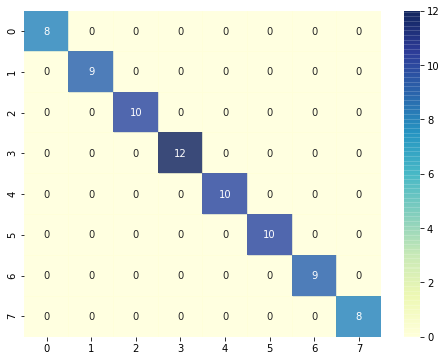

In [36]:
plot_confusion_matrix(train_y, predict_train)

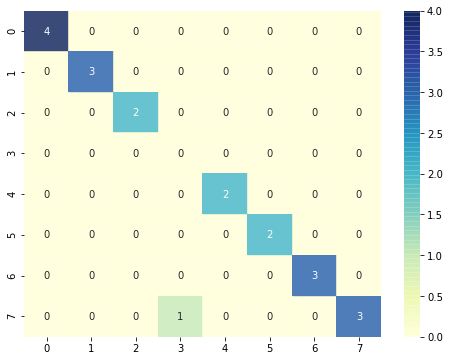

In [37]:
plot_confusion_matrix(test_y, predict_test)

In [52]:
testData = pd.DataFrame([[102, 10, 502, 27, 6, 501, 28, 20, 10, 9, 1, 31]])
predict_test = model.predict(testData)
predict_test

array(['Supplier 2'], dtype=object)